# Restructuring introduction

## Starting model

In [1]:
from compute import Var
from datastructures.api import Model, adda

In [2]:
model = Model()
m = model.root
Pbus = Var('P_{bus}')
A = Var('A', 0.5)
Pcomms = adda(m, 'P_{comms}', 483.3*A-Pbus)
adda(m, Pbus, 10*abs(Pcomms)**0.5)
h = Var('h', 400e3)
D = Var('D', 0.1)
R = adda(m, 'R', Pcomms*D**2/h**2*1e18/(8e6))
C = adda(m, 'C', 2.5*D**2+12*(A+1)+0.1*Pbus)

In [6]:
import sympy as sp
from compute import Par

In [31]:
model = Model()
m = model.root
alpha = Par(r'\alpha',50)
ct = Par('c_t', 1.163)
ms = Par('m_s', 1.175)
dV = Par(r'\Delta v', 12800)
v = Par('v', 9.8*450)
CT = Par('C_T', 1000)
CD = Var('C_D')
D = adda(m, 'D', (CD/alpha)**(1/3))
mt = adda(m, 'm_t', ms*D**2)
mi = adda(m, 'm_i', sp.exp(dV/v)*mt)
adda(m, CD, CT-ct*mi)

C_D

In [33]:
edges, tree = model.generate_formulation()
from datastructures.rendering import render_incidence

In [39]:
tree = ({0:1,3:1,2:1,1:1},{},{})

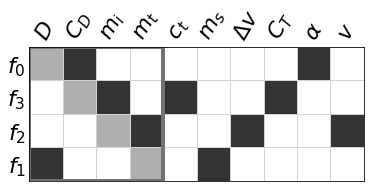

In [40]:
render_incidence(edges, tree, hideticks=True, rawvarname=True, patchwidth=4, fontsize=22);

In [48]:
np.array([[1., -5/np.sqrt(1.)], [1.,1.]])

array([[ 1., -5.],
       [ 1.,  1.]])

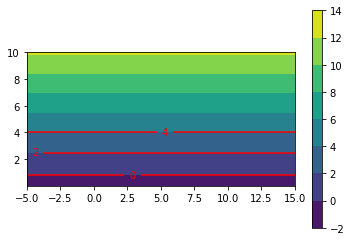

In [58]:
S = 10
a = 10
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-5, 15, 100)
y = np.linspace(0.001, 10, 100)
xx, yy = np.meshgrid(x, y)
@np.vectorize
def f(x, y):
    return np.linalg.solve(np.array([[1., -a/(2*np.sqrt(y))], [1.,1.]]),np.array([x-a*np.sqrt(y),x+y-S]))[1]
zz = f(xx, yy)
plt.contourf(xx, yy, zz)
plt.colorbar()
CS = plt.contour(xx, yy, zz, levels=[0,2,4], colors=('r',));
plt.gca().clabel(CS, inline=1, fontsize=10)
plt.gca().set_aspect("equal")
plt.show()

In [55]:
f(0,730)

array(0.15621318)

In [45]:
(-10+100+100)/(1+5/10)

126.66666666666667

In [52]:
S = 1000
a = 10
(np.sqrt(a**2+4*S)/2-a/2)**2

729.8437881283576

We restructure with extended tearing

## Restructuring interface

In [10]:
from datastructures.graphutils import all_variables, all_edges
from datastructures.tearing import dir_graph, min_arc_set_assign
from datastructures.operators import reformulate

In [8]:
edges, tree = model.generate_formulation()
not_output = ['h', 'D', 'R'] # This forces the solution from the thesis to come out
eqnidxs = list(edges[1].keys())
varidxs = all_variables(*edges)
graph_edges_minassign = all_edges(*edges)
edges_left_right = list(dir_graph(graph_edges_minassign, eqnidxs, {}))
xsol,_ = min_arc_set_assign(edges_left_right, varidxs, eqnidxs, not_output=not_output)

In [9]:
outset_initial = {comp: var[0] for comp,var in edges[1].items()}
outset_opt = {right:left for left, right in edges_left_right 
                  if (left,right) in edges_left_right and xsol[left, right] > 0.5}

In [10]:
edges_minassign, tree_minassign = reformulate(edges, tree, outset_initial, 
                                              outset_opt, solveforvars=False)

## Visualize HSM

In [12]:
from datastructures.rendering import render_incidence

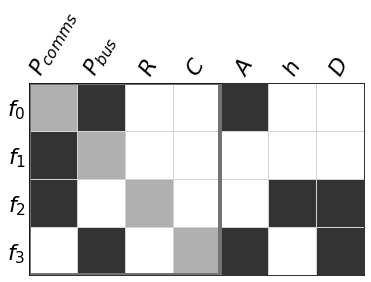

In [14]:
render_incidence(edges, tree, hideticks=True, rawvarname=True, patchwidth=4, fontsize=22);

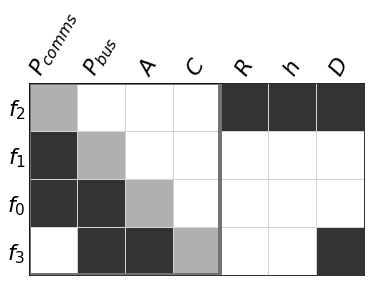

In [13]:
render_incidence(edges_minassign, tree_minassign, hideticks=True, rawvarname=True, patchwidth=4, fontsize=22);